In [2]:
from pymongo import MongoClient
import pandas as pd
my_crop_data = pd.read_csv('N:\\Projects\\Analytical Programming and Data Visualizatin\\DataSet\\APY.csv')

#MongoDB connection details for loading the data
client = MongoClient("mongodb://localhost:27017/")
db = client["analytics_project"]
collection = db["Crop_Details"]
data_dict = my_crop_data.to_dict("records")
collection.insert_many(data_dict)
print(f"Inserted {len(data_dict)} records into MongoDB collection '{collection.name}' in database '{db.name}'.")

Inserted 345336 records into MongoDB collection 'Crop_Details' in database 'analytics_project'.


In [4]:
from pymongo import MongoClient
import pandas as pd

#Retrieving data from MongoDB for further analysis
client = MongoClient("mongodb://localhost:27017/")
db = client["analytics_project"]
collection = db["Crop_Details"]

data_from_db = list(collection.find())
data = pd.DataFrame(data_from_db)

if '_id' in data.columns:
    data = data.drop('_id', axis=1)

C:\Users\gowth\AppData\Local\Temp\ipykernel_35880\4028324913.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Production'].fillna(data['Production'].median(), inplace=True)
C:\Users\gowth\AppData\Local\Temp\ipykernel_35880\4028324913.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cleaned_data, x='Crop_Year', y='Production', estimator='sum', ci=None, marker='o')


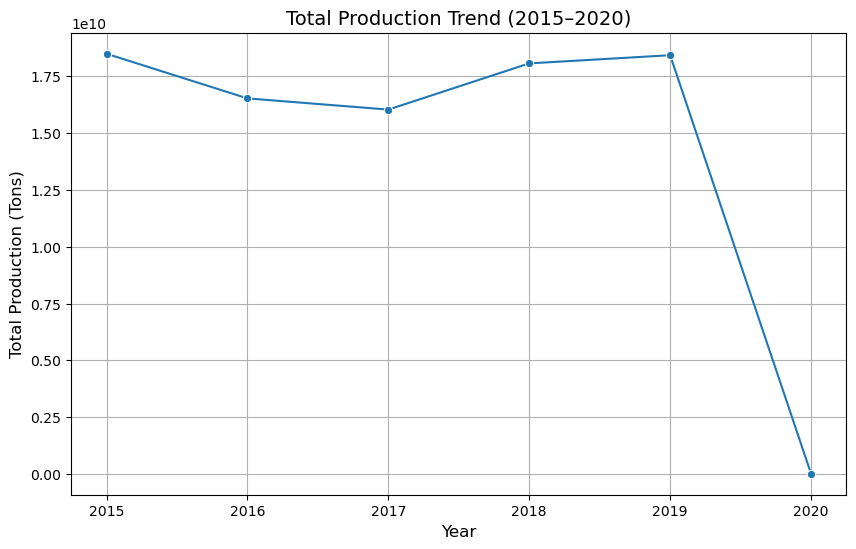

C:\Users\gowth\AppData\Local\Temp\ipykernel_35880\4028324913.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_districts.values, y=top_districts.index, palette="viridis")


C:\Users\gowth\AppData\Local\Temp\ipykernel_35880\4028324913.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crops.values, y=top_crops.index, palette="coolwarm")


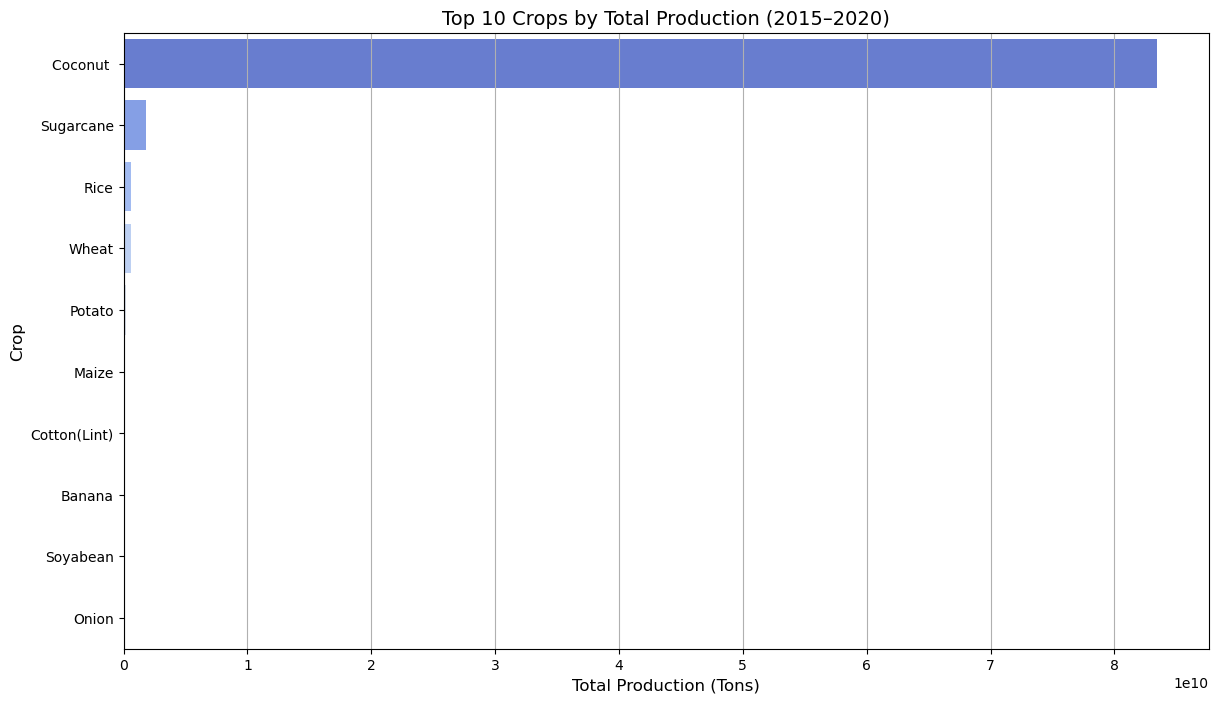

C:\Users\gowth\AppData\Local\Temp\ipykernel_35880\4028324913.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_production.index, y=seasonal_production.values, palette="muted")


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data.columns = data.columns.str.strip()

data.dropna(subset=['Crop'], inplace=True)

data['Production'].fillna(data['Production'].median(), inplace=True)

data.drop_duplicates(inplace=True)

data['State'] = data['State'].str.title()
data['District'] = data['District'].str.title()
data['Crop'] = data['Crop'].str.title()
data['Season'] = data['Season'].str.title()

filtered_data = data[(data['Crop_Year'] >= 2015) & (data['Crop_Year'] <= 2020)]

cleaned_data = filtered_data.dropna(subset=['Production'])

cleaned_data = cleaned_data.drop_duplicates()

crop_data_cleaned = cleaned_data.to_csv("N:\\Projects\\Analytical Programming and Data Visualizatin\\DataSet\\cleaned_crop_data.csv")

# Visualization: Trend of production over years
plt.figure(figsize=(10, 6))
sns.lineplot(data=cleaned_data, x='Crop_Year', y='Production', estimator='sum', ci=None, marker='o')
plt.title('Total Production Trend (2015–2020)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Production (Tons)', fontsize=12)
plt.grid(visible=True)
plt.show()

# Visualization: Distribution of yield across states in this period
plt.figure(figsize=(12, 8))
sns.boxplot(data=cleaned_data, x='State', y='Yield')
plt.title('Yield Distribution by State (2015–2020)', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Yield', fontsize=12)
plt.xticks(rotation=90)
plt.grid(visible=True)
plt.show()

# Aggregate by State and calculate mean Yield
state_yield = data.groupby('State')['Yield'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
state_yield.plot(kind='bar', color='skyblue')
plt.title('Top 10 States by Average Yield', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Yield', fontsize=14)
plt.xticks(rotation=45)
plt.show()


# Visualization: Crop Production by Districts
plt.figure(figsize=(14, 8))
top_districts = cleaned_data.groupby('District')['Production'].sum().sort_values(ascending=False).head(20)
sns.barplot(x=top_districts.values, y=top_districts.index, palette="viridis")
plt.title('Top 20 Districts by Total Production (2015–2020)', fontsize=14)
plt.xlabel('Total Production (Tons)', fontsize=12)
plt.ylabel('District', fontsize=12)
plt.grid(visible=True, axis='x')
plt.show()

# Visualization: Top 10 Crops by Total Production
plt.figure(figsize=(14, 8))
top_crops = cleaned_data.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_crops.values, y=top_crops.index, palette="coolwarm")
plt.title('Top 10 Crops by Total Production (2015–2020)', fontsize=14)
plt.xlabel('Total Production (Tons)', fontsize=12)
plt.ylabel('Crop', fontsize=12)
plt.grid(visible=True, axis='x')
plt.show()

# Visualization: Production Contribution by Season (Bar Plot)
plt.figure(figsize=(10, 6))
seasonal_production = cleaned_data.groupby('Season')['Production'].sum().sort_values(ascending=False)
sns.barplot(x=seasonal_production.index, y=seasonal_production.values, palette="muted")
plt.title('Production Contribution by Season (2015–2020)', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Production (Tons)', fontsize=12)
plt.grid(visible=True, axis='y')
plt.show()


In [8]:
import psycopg2
from sqlalchemy import create_engine

# PostgreSQL connection details
host = "localhost"
port = "5432"
database = "analytics_db"
user = "postgres"
password = "gowtham2096"

engine = create_engine(f"postgresql://{user}:{password}@{host}:{port}/{database}")
table_name = "crop_details"

#Try and Except method to upload data into Postgre
try:
    connection = engine.connect()
    data.to_sql(table_name, engine, if_exists="replace", index=False)
    
    print(f"Data successfully uploaded to PostgreSQL table '{table_name}' in database '{database}'.")
except Exception as e:
    print("An error occurred:", e)
finally:
    connection.close()


Data successfully uploaded to PostgreSQL table 'crop_details' in database 'analytics_db'.


In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# PostgreSQL connection details
host = "localhost"
port = "5432"
database = "analytics_db"
user = "postgres"
password = "gowtham2096"

engine = create_engine(f"postgresql://{user}:{password}@{host}:{port}/{database}")
table_name = "crop_details"

#try and except method to read the dat from postgres
try:
    query = f"SELECT * FROM {table_name}"
    data = pd.read_sql(query, engine)
    
    print("Data successfully fetched from PostgreSQL.")
    print(data.head())
except Exception as e:
    print("An error occurred while fetching data:", e)